# WeatherPy
----



In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key
temp_units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count 
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | west bay
Processing Record 5 of Set 1 | synevyr
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | north marysville
Processing Record 10 of Set 1 | eston
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | umiray
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | emirdag
Processing Record 21 of Set 1 | scottsboro
Processing Record 22 of Set 1 | souillac
Processing Record 23 of Set 1 | uarini
City not found. Skipping...
Processing Record 24 of Set 1 | mount darwin
P

City not found. Skipping...
Processing Record 35 of Set 4 | krasnogorsk
Processing Record 36 of Set 4 | hofn
City not found. Skipping...
Processing Record 37 of Set 4 | paamiut
Processing Record 38 of Set 4 | archidona
Processing Record 39 of Set 4 | camacha
Processing Record 40 of Set 4 | karratha
Processing Record 41 of Set 4 | eureka
Processing Record 42 of Set 4 | standish
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | calama
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | mahibadhoo
Processing Record 48 of Set 4 | mansa
Processing Record 49 of Set 4 | ghanzi
Processing Record 1 of Set 5 | mwinilunga
Processing Record 2 of Set 5 | cockburn town
City not found. Skipping...
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | alekseyevka
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | kerema
Processing Record 7 of Set 5 | minatitlan
Pr

Processing Record 16 of Set 8 | marsh harbour
Processing Record 17 of Set 8 | colquechaca
Processing Record 18 of Set 8 | salalah
Processing Record 19 of Set 8 | herat
Processing Record 20 of Set 8 | batagay
Processing Record 21 of Set 8 | storforshei
Processing Record 22 of Set 8 | williams lake
Processing Record 23 of Set 8 | solwezi
City not found. Skipping...
Processing Record 24 of Set 8 | cefalu
Processing Record 25 of Set 8 | lagos de moreno
Processing Record 26 of Set 8 | medea
Processing Record 27 of Set 8 | kiama
Processing Record 28 of Set 8 | erdenet
Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | visnes
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | sona
Processing Record 33 of Set 8 | nanga eboko
Processing Record 34 of Set 8 | iracoubo
Processing Record 35 of Set 8 | ponnani
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | beyneu
Processing Record 39 of Set

Processing Record 5 of Set 12 | zaria
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [13]:

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [14]:

# show the top of the dataframe
weather_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,1,US,1570148327,71,39.95,-94.76,55.40,8.05
1,port hardy,52,CD,1570148327,66,-7.04,29.76,68.64,4.18
2,khatanga,0,RU,1570148327,85,71.98,102.47,19.37,9.78
3,west bay,5,US,1570148327,33,31.80,-97.09,91.99,12.80
4,synevyr,100,UA,1570148328,83,48.49,23.62,45.00,1.99


In [15]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [16]:

weather_dataframe.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [17]:

weather_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,1,US,1570148327,71,39.95,-94.76,55.40,8.05
1,port hardy,52,CD,1570148327,66,-7.04,29.76,68.64,4.18
2,khatanga,0,RU,1570148327,85,71.98,102.47,19.37,9.78
3,west bay,5,US,1570148327,33,31.80,-97.09,91.99,12.80
4,synevyr,100,UA,1570148328,83,48.49,23.62,45.00,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

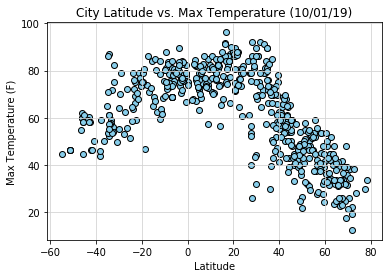

In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

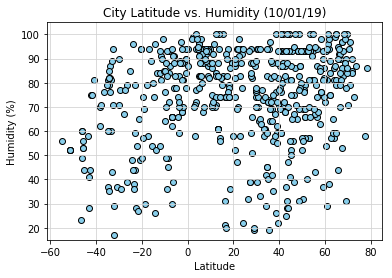

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fgig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

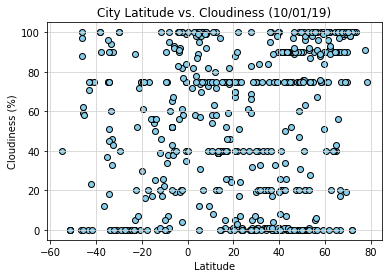

In [21]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

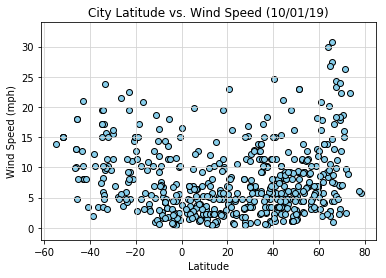

In [22]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

Observations :

•	Temperature increases as latitude gets closer to 0 (equator).

•	The highest altitude 60 to 80 is warmer than the lowest -40 to –60.

•	Humidity is more concentrated in higher latitude cities.

•	No relationship between cloudiness and latitude.

•	Most of windspeed data is less than 15 regardless of the latitude .
